# Week 1: Gradient Descent and Stochastic Gradient Descent

### a) Maximum Likelihood 
Let $X \in \mathbb{R}^{n \times d}$ denote the matrix of covariates, $\theta^{*} \in \mathbb{R}^{d}$ denote the true parameter, and $t \in \mathbb{R}^{n}$ denote the observations we get from the following linear model
$$y = X \theta^{*} + w$$
Here $w\in\mathbb{R}^{d}$ denotes the noise in our observations and is usually model as an isotropic Gaussian, namely $w \sim \mathcal{N}(0, \sigma^2 I)$

Let $\hat{\theta}$ be an estimator for $\theta^{*}$, defined as $\hat{\theta} = \text{arg min}_{\theta \in \mathbb{R}^{d}} \mathcal{l}(y, X\theta) = \text{arg min}_{\theta \in \mathbb{R}^{d}} ||y-X\theta||_{2}^{2}$. 

Verify that $\hat{\theta}$ corresponds to the Maximum Likelihood Estimate for the linear model described. Is there a closed form expression for this estimate?

$$\mathcal{L}(\theta | X,y) = \frac{1}{\sqrt{2 \pi \sigma^{2}}} e ^ {\frac{-||y-X\theta||_{2}^{2}}{2 \sigma^{2}}}$$

Since maximizing the likelihood is equivalent to minimizing its negative logarithm:
$$\begin{align*}
-\log{(\mathcal{L}(\theta | X,y))} &= -\log{(\frac{1}{\sqrt{2 \pi \sigma^{2}}} e ^ {\frac{-||y-X\theta||_{2}^{2}}{2 \sigma^{2}}})} \\
&= \frac{n}{2} \log{(2 \pi \sigma^2)} + \frac{||y-X\theta||_{2}^{2}}{2 \sigma^2}\\
&= \frac{n}{2} \log{(2 \pi \sigma^2)} + \frac{y^T y - 2\theta ^ T X^T y + \theta ^ T X ^ T X \theta}{2 \sigma ^ 2}
\end{align*}$$

Minimizing for $\theta$
$$\frac{\partial}{\partial \theta}( \frac{y^T y - 2\theta ^ T X^T y + \theta ^ T X ^ T X \theta}{2 \sigma ^ 2}) = 0$$
We get
$$
\begin{align*}
\frac{\partial}{\partial \theta}( \frac{y^T y - 2\theta ^ T X^T y + \theta ^ T X ^ T X \theta}{2 \sigma ^ 2})  ^=  \frac{-2X^T y + (X^T X θ + (X^T X)^T θ)}{2 \sigma ^ 2} \\
&= \frac{-2X^T y + (X^T X θ + (X^T X)^T θ)}{2 \sigma ^ 2} \\
&= \frac{-2X^T y + (X^T X θ + (X^T X + X^T X) θ}{2 \sigma ^ 2} \\
&= \frac{-2X^T y + (X^T X θ + (2X^T X θ) θ}{2 \sigma ^ 2}
\end{align*}$$
When making the derivative equal to zero:
$$\frac{\partial}{\partial \theta}( \frac{y^T y - 2\theta ^ T X^T y + \theta ^ T X ^ T X \theta}{2 \sigma ^ 2}) = 0$$
Then,
$$-2X^T y + (X^T X θ + (2X^T X θ) θ = 0$$
Thus, we get this closed-form:

$$-2X^T y + 2X^T X θ = 0$$

$$2X^T X θ = 2X^T y$$

$$ θ = (X^T X)^{-1} X^T y$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 1000
d = 50
X = np.random.normal(loc=0, scale=np.sqrt(0.1), size=(n, d))
theta_star = np.random.rand(d)
y = X.dot(theta_star)

beta = 0.5  
alpha = 0.25  

In [3]:
def l2_loss(theta, X=X, y=y):
    predictions = np.dot(X, theta)
    error = y - predictions
    squared_loss = np.sum(error ** 2)
    l2_loss = squared_loss
    return l2_loss
    
def gradient_l2(theta, X=X, y=y):
    predictions = np.dot(X, theta)
    error = y - predictions
    grad_theta = -2 * np.dot(X.T, error)
    return grad_theta

### b) Gradient Descent

In [4]:
def gradient_descent():
    n, d = X.shape
    theta = np.random.rand(d)
    k = 50
    t = 0.001

    loss_track = [l2_loss(theta)]
    
    for it in range(k):
        gradient = gradient_l2(theta)
        '''
        while(l2_loss(theta - t * gradient) > l2_loss(theta) - alpha * t * np.linalg.norm(gradient)**2):
            t *= beta
        '''
        theta = theta -  t*gradient
        loss_track.append(l2_loss(theta))
    return loss_track, theta

[733.375386031013, 466.45372266606347, 298.9725529587538, 193.0517193786369, 125.54604126061287, 82.20126435978858, 54.169438930717064, 35.91559427225588, 23.95070285958409, 16.058945760363997, 10.822853977627942, 7.329287596466653, 4.986017731825543, 3.4064582830742673, 2.336700356559505, 1.6089977097563475, 1.1119108341845294, 0.7710166391315285, 0.5363653945741527, 0.3742752522807651, 0.2619331803119977, 0.18382286133137726, 0.12934896279852515, 0.09124925315823824, 0.06452831563974919, 0.04573834291404644, 0.03249199772081093, 0.023131145305987484, 0.016500732249641138, 0.011793883926746901, 0.008445427461036312, 0.006058463143004692, 0.004353569146596563, 0.0031335584834046564, 0.0022589566192543, 0.0016308917659141101, 0.0011791255960138581, 0.0008536586922303301, 0.0006188286614957184, 0.0004491509263394686, 0.0003263809309847456, 0.0002374345014842425, 0.00017291255470675812, 0.00012605238340002557, 9.198069925722234e-05, 6.718059169709604e-05, 4.911044233465201e-05, 3.59309955

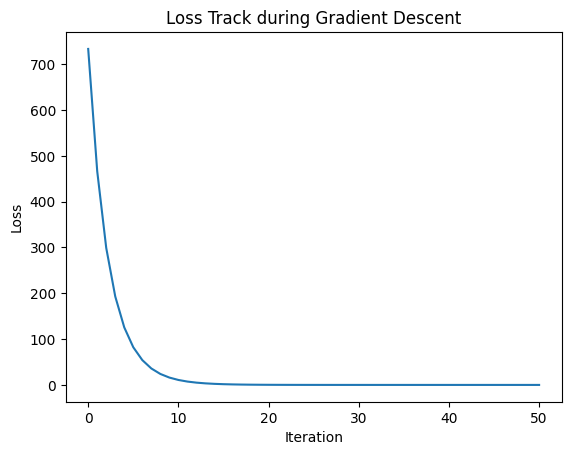

In [5]:
loss_track, optimal_theta = gradient_descent()
print(loss_track)

plt.plot(loss_track)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Track during Gradient Descent')
plt.show()

### c) Stochastic Gradient Descent

In [12]:
def stochastic_gradient_descent():
    n, d = X.shape
    theta = np.random.rand(d)
    k = 50
    t = 0.01

    loss_track = [l2_loss(theta)]
    
    for it in range(k):
        batch_size = 5
        idx = np.random.choice(n, batch_size, replace=False)
        X_i = X[idx]
        y_i = y[idx]
        
        gradient = gradient_l2(theta, X=X_i, y= y_i)
        
        '''
        while(l2_loss(theta - t * gradient) > l2_loss(theta) - alpha * t * np.linalg.norm(gradient)**2):
            t *= beta
        '''
        theta = theta -  t*gradient
        loss_track.append(l2_loss(theta, X=X_i, y= y_i))
    return loss_track, theta

[973.8959334051773, 4.725741893279494, 4.147596547077743, 2.2657238865022307, 2.9874949551412864, 0.773484529374016, 2.9322071898204154, 1.9151182115548522, 5.598061388194377, 3.3607748724732147, 4.74286384514774, 1.230058572565504, 4.409822548126532, 6.58391716669893, 4.0446857324247265, 5.489640572826004, 2.8716407863348827, 1.3033847640078604, 2.2118961701240676, 1.4873741623134675, 1.3244251283452644, 3.740223969180758, 0.39527510368145363, 1.213669433551271, 2.4452647240858902, 1.4607688652815998, 0.7674352765050279, 5.491075436858827, 0.9675733070530365, 1.5529983563723213, 0.7587221434474805, 4.152139401747354, 1.4712468930605995, 2.882388805464206, 1.7072414604520398, 2.1676126309387054, 2.335337970818915, 1.8977858778442693, 2.6628584802863537, 3.3987095916499084, 1.3426604432805054, 1.3032048594287726, 0.5700609129385878, 1.3896303157807925, 3.4514214811240964, 0.43051537599870665, 2.2550299724697656, 1.5800889519719434, 0.6068412344129885, 3.611558119027559, 1.48441630749720

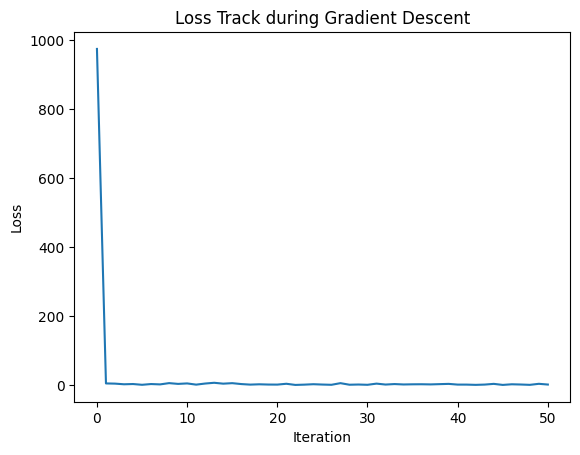

In [13]:
loss_track, optimal_theta = stochastic_gradient_descent()
print(loss_track)

plt.plot(loss_track)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss Track during Gradient Descent')
plt.show()